# Random Forest Classification
## 118. Random Forest Classification Intuition

### Ensemble Learning
&nbsp;結合多種不同的Machine Learning演算法而產生的演算法。(RF就是結合了很多決策樹而成的，之前在介紹回歸的時候有提到)
### 建置步驟
<ul> 
<li>Step1:&nbsp;&nbsp;&nbsp;pick at random K data point from Training set(N)(Bagging)<br>
&nbsp;從樣本數(N)中，決定抽取K項data()<br> 
<li>Step2:&nbsp;&nbsp;&nbsp;build decision tree(Build Tree)<br>
&nbsp;建造決策樹<br>
<li>Step3:&nbsp;&nbsp;&nbsp;choose the number Ntree of tree(repeat step1 and step2)<br>
&nbsp;選定樹的數量後，重複步驟1和步驟2 (ps.每次種完樹，要將K項data()放回N)<br>
<li>Step4:&nbsp;&nbsp;&nbsp;to vote and decide the result(Ensemble)<br>
&nbsp;採多數決(相對多數、絕對多數)，決定結果
</ul>

### Case:&nbsp;&nbsp;&nbsp;微軟的kinect 
&nbsp;用紅外線偵測身體位置後，運用RF演算法來了解我們人的身體動作所代表的意義<br>
&nbsp;參考資料:&nbsp;&nbsp;&nbsp;<a href="https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/BodyPartRecognition.pdf">Real-Time Human Pose Recognition in Parts from Single Depth Images</a>

## 120. Random Forest Classification in Python

### Python 範例
#### 分成以下步驟：
<ol>
<li>資料預處理
<li>建立預測模型
<li>對測試資料集進行預測
<li>製成混淆矩陣
<li>作圖觀察模型效果
</ol>

### 1. 資料預處理

In [40]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [43]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Applications/Anaconda3/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 2. 建立預測模型

In [44]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### 3. 對測試資料集進行預測

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### 4. 製成混淆矩陣

In [50]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  5]
 [ 3 29]]


### 5. 作圖觀察模型效果

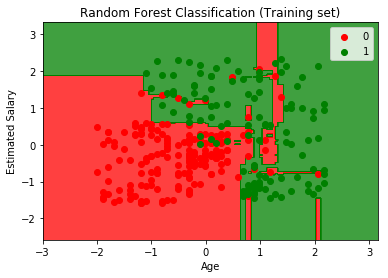

In [47]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

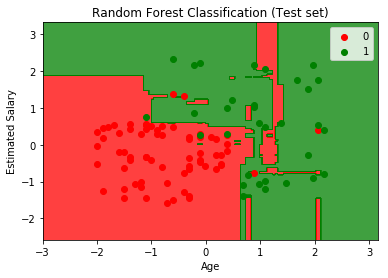

In [48]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()